In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv("dataset.csv") 

# Show the shape and first few rows
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
df.head()


Rows: 4424, Columns: 35


,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [1]:
df.isnull().sum()

NameError: name 'df' is not defined

In [1]:
df.isnull().sum()

NameError: name 'df' is not defined

In [2]:
import pandas as pd

df = pd.read_csv("dataset.csv")


In [3]:
df.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

In [4]:
df['Target'].value_counts()


Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

In [5]:
df['Target'] = df['Target'].apply(lambda x: 1 if x == 'Dropout' else 0)
df['Target'].value_counts()


Target
0    3003
1    1421
Name: count, dtype: int64

In [6]:
df.select_dtypes(include='object').columns


Index([], dtype='object')

In [7]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df.drop('Target', axis=1)
y = df['Target']

# Split into 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Show shape of splits
print(f"Train: {X_train.shape}, Test: {X_test.shape}")


ModuleNotFoundError: No module named 'sklearn'

In [8]:
!pip install scikit-learn


     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.8 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.8 kB ? eta -:--:--
     ------------------- ------------------ 30.7/60.8 kB 325.1 kB/s eta 0:00:01
     -------------------------------------- 60.8/60.8 kB 459.3 kB/s eta 0:00:00
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.1/11.1 MB 1.7 MB/s eta 0:00:07
   ---------------------------------------- 0.1/11.1 MB 1.6 MB/s eta 0:00:07
    --------------------------------------- 0.2/11.1 MB 1.5 MB/s eta 0:00:08
   - -------------------------------------- 0.4/11.1 MB 2.5 MB/s eta 0:00:05
   - -------------------------------------- 0.5/11.1 MB 2.6 MB/s eta 0:00:05
   -- ------------------------------------- 0.7/11.1 MB 3.0 MB/s eta 0:00:04
   --- ------------------------------------ 0.9/11.1 MB 3.3 MB/s eta 0:00:04
   ---- -----


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\suhan\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [9]:
from sklearn.model_selection import train_test_split

X = df.drop('Target', axis=1)
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Train: {X_train.shape}, Test: {X_test.shape}")


Train: (3539, 34), Test: (885, 34)


In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize and train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8632768361581921

Confusion Matrix:
 [[531  38]
 [ 83 233]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.93      0.90       569
           1       0.86      0.74      0.79       316

    accuracy                           0.86       885
   macro avg       0.86      0.84      0.85       885
weighted avg       0.86      0.86      0.86       885



In [3]:
import pandas as pd
df = pd.read_csv("dataset.csv")
df['Target'] = df['Target'].apply(lambda x: 1 if x == 'Dropout' else 0)

In [4]:
from sklearn.model_selection import train_test_split

X = df.drop('Target', axis=1)
y = df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


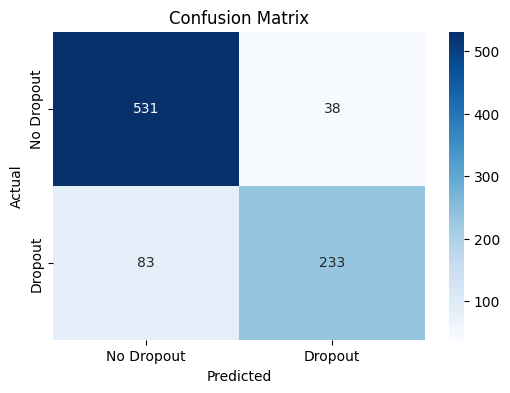

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Dropout', 'Dropout'], yticklabels=['No Dropout', 'Dropout'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
